# Mašinsko učenje - Linearna regresija, iterativno obučavanje

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Zadatak 1
Napisati funkciju za računanje greške i njen izvod. Greška se računa kao kvadrat razlike procenjen i stvarne vrednosti.

## Rešenje

In [2]:
def greska(y_p, y):
    return (y_p - y)**2

def izvod_greske(y_p, y):
    return 2*(y_p - y)

## Zadatak 2
Napisati funkciju za nasumično obučavanje modela. Od parametara ova funkcija prima vektore $\vec{x}$, očekivane vrednosti $\vec{y}$, maksimalni broj koraka obučavanja i toleranciju. Rezultat funkcije treba da je obučen model. Rešenje testirati na zadatim podacima.

Algoritam za obučavanje:
1. Nasumično odabrati težine
2. Izračunati grešku
3. Nasumično odabrati nove težine
4. Izračunati grešku za nove težine
5. Ukoliko je greška za nove težine manja od greške za trenutne težine, postaviti trenutne težine na nove težine i postaviti grešku za trenutne težine na novu grešku.
6. Ukoliko je broj odrađenih koraka manji od maksimalnog broja koraka i greška veća od zadate tolerancije ponoviti izvršavanje od koraka 3.
7. Vratiti obučen model.

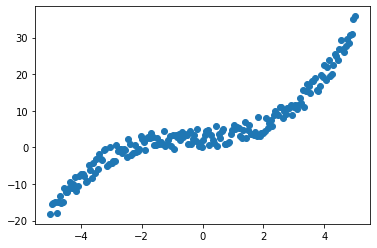

In [3]:
def f(x):
    return 0.18*x**3+0.2*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)
plt.scatter(x, y)

## Rešenje

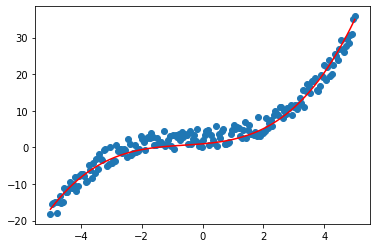

In [4]:
def lin_reg_nasumicno_obucavanje(x, y, maksimalno_koraka=10000, tolerancija=0.001):
    korak = 0
    w = np.random.random(len(x[0]))
    y_p = x@w
    g = np.sum(greska(y_p, y))
    
    while korak < maksimalno_koraka and g > tolerancija:
        wn = np.random.random(len(x[0]))
        y_p = x@wn
        gn = np.sum(greska(y_p, y))
        if gn < g:
            g = gn
            w = wn
        korak += 1
    
    def model(x):
        return x@w
    
    return model

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))
model = lin_reg_nasumicno_obucavanje(xx, y)

plt.scatter(x, y)
plt.plot(x, model(xx), 'r')

## Zadatak 3
Napisati funkciju za obučavanje modela pomeranjem parametara za fiksni korak. Od parametara ova funkcija prima vektore $\vec{x}$, očekivane vrednosti $\vec{y}$, maksimalni broj koraka obučavanja, dužinu koraka za ažuriranje težina i toleranciju. Rezultat funkcije treba da je obučen model. Rešenje testirati na zadatim podacima.

Algoritam za obučavanje:
1. Nasumično odabrati težine
2. Izračunati grešku
3. Za svaku težinu izračunati grešku prilikom umanjenja ili uvećanja težine za dužinu koraka.
4. Ukoliko je umanjenje dovelo do manje greške od početne greške postaviti umanjenu težinu za trenutnu težinu i postaviti trenutnu grešku na grešku pri umanjenu težinu, ukoliko je uvećenje težine dovelo do manje greške od početne greške postaviti uvećanu težinu za trenutnu težinu i postaviti trenutnu grešku na grešku pri uvećanju težine. Ukoliko ni za jednu težinu prilikom promene težine nijde došlo do poboljšanja greške prepoloviti dužinu koraka.
6. Ukoliko je broj odrađenih koraka manji od maksimalnog broja koraka i greška veća od zadate tolerancije ponoviti izvršavanje od koraka 3.
7. Vratiti obučen model.

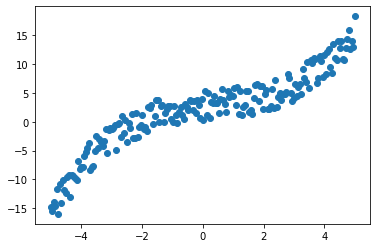

In [5]:
def f(x):
    return 0.1*x**3-0.11*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)
plt.scatter(x, y)

## Rešenje

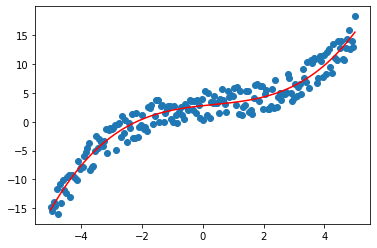

In [6]:
def lin_reg_fiksni_korak_obucavanje(x, y, maksimalno_koraka=1000, d=0.1, t=0.1):
    korak = 0
    w = np.random.random(len(x[0]))
    y_p = x@w
    e = np.average(greska(y_p, y))
    while korak < maksimalno_koraka and e > t:
        azurirano = False
        for i in range(len(w)):
            wnn = np.copy(w)
            wnp = np.copy(w)
            
            wnn[i] -= d
            wnp[i] += d
            y_pn = x@wnn
            y_pp = x@wnp
            en = np.average(greska(y_pn, y))
            ep = np.average(greska(y_pp, y))
            
            if en < e or ep < e:
                azurirano = True
                if en < ep:
                    e = en
                    w = wnn
                else:
                    e = ep
                    w = wnp
        
        if not azurirano:
            d = d/2
        
        korak += 1
        
    def model(x):
        return x@w
    
    return model

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))
model = lin_reg_fiksni_korak_obucavanje(xx, y)

plt.scatter(x, y)
plt.plot(x, model(xx), 'r')

## Zadatak 4
Napisati funkciju za obučavanje modela koristi algoritam stohastičkog gradijentnog spusta. Od parametara ova funkcija prima vektore $\vec{x}$, očekivane vrednosti $\vec{y}$, maksimalni broj koraka obučavanja i faktor za određivanje brzine obučavanja. Rezultat funkcije treba da je obučen model. Rešenje testirati na zadatim podacima.

Algoritam za obučavanje:
1. Nasumično odabrati težine
2. Izračunati grešku
3. Za svaki ulazni vektor $\vec{x}$ izračunati parcijalne izvode funkcije greške po težinama.
4. Ažurirati težine umanjivanjem težina za dobijene vrednosti parcijalnih izvoda pomnožene faktorom koji određuje brzinu obučavanja.
5. Ukoliko je broj odrađenih koraka manji od maksimalnog broja koraka i greška veća od zadate tolerancije ponoviti izvršavanje od koraka 3.
6. Vratiti obučen model.

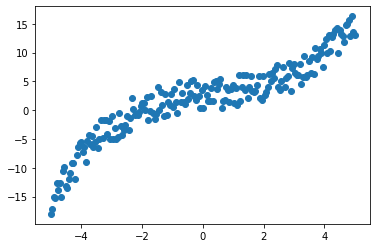

In [7]:
def f(x):
    return 0.1*x**3-0.11*x**2+0.63*x+np.random.random(len(x))*5.5

x = np.linspace(-5, 5, 200)
y = f(x)
plt.scatter(x, y)

## Rešenje

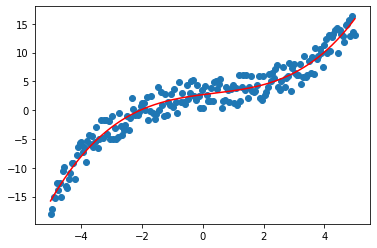

In [8]:
def lin_reg_sgd(x, y, lr=0.000001, maksimalno_koraka=1000):
    w = np.random.random(len(x[0]))
    for _ in range(maksimalno_koraka):
        for i, xp in enumerate(x):
            wd = np.zeros(len(w))
            for j in range(len(w)):
                wd[j] = (2*izvod_greske(xp@w, y[i])*xp[j])
            w -= lr*wd
    
    def model(x):
        return x@w
    
    return model

xx = np.column_stack((x*x*x, x*x, x, np.ones(len(x))))
model = lin_reg_fiksni_korak_obucavanje(xx, y)

plt.scatter(x, y)
plt.plot(x, model(xx), 'r')

## Zadatak 5
Učitati podatke iz datoteke abalone.csv. Na osnovu učitanog skupa podataka obučiti model za predviđanje vrednosti atributa Whole weight na osnovu atributa Length.

## Rešenje

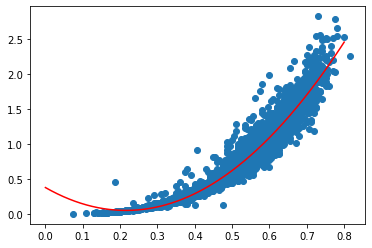

In [9]:
def broj(s):
    try:
        return float(s)
    except:
        return s

with open("datasets/abalone.csv") as fp:
    data = list(map(lambda d: list(map(lambda d: broj(d.strip()), d.split(",")[1:])), fp.readlines()))[1:]
    
    data = np.array(data)
    x = data[:,0]
    y = data[:,3]
    xx = np.column_stack([x**2, x, np.ones(len(x))])
    model = lin_reg_sgd(xx, y, lr=0.001, maksimalno_koraka=1000)
    plt.scatter(x, y)
    plt_x = np.linspace(0, 0.8, 1000)
    plt_xx = np.column_stack([plt_x**2, plt_x, np.ones(len(plt_x))])
    plt.plot(plt_x, model(plt_xx), 'r')